In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import joblib

In [2]:
data=pd.read_excel(r"C:\Users\user\Desktop\Iris Classification\data\iris .xls")

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [6]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.groupby('Classification').size()

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [8]:
data.skew()

C:\Users\user\AppData\Local\Temp\ipykernel_15008\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


SL    0.314911
SW    0.334053
PL   -0.274464
PW   -0.104997
dtype: float64

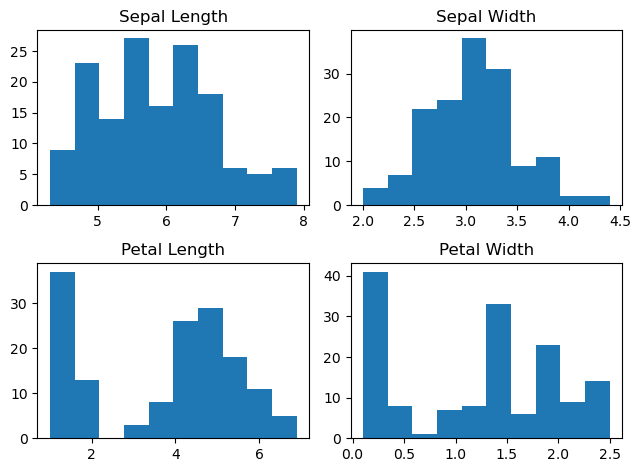

In [9]:
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(data['SL'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(data['SW'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(data['PL'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(data['PW'], bins = n_bins);
axs[1,1].set_title('Petal Width');
# add some spacing between subplots
fig.tight_layout(pad=1.0);

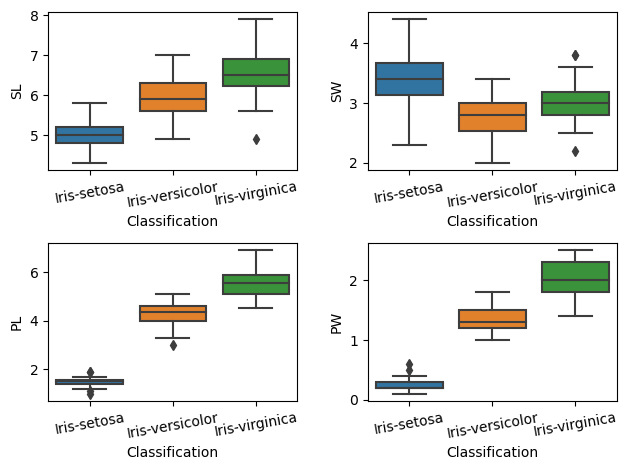

In [10]:
fig, axs = plt.subplots(2, 2)
fn = ["SL", "SW", "PL", "PW"]
cn = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
k=sns.boxplot(x = 'Classification', y = 'SL', data = data, order = cn, ax = axs[0,0]);
plt.setp(k.get_xticklabels(), rotation=10)
k=sns.boxplot(x = 'Classification', y = 'SW', data = data, order = cn, ax = axs[0,1]);
plt.setp(k.get_xticklabels(), rotation=10)
k=sns.boxplot(x = 'Classification', y = 'PL', data = data, order = cn, ax = axs[1,0]);
plt.setp(k.get_xticklabels(), rotation=10)
k=sns.boxplot(x = 'Classification', y = 'PW', data = data,  order = cn, ax = axs[1,1]);
plt.setp(k.get_xticklabels(), rotation=10)
fig.tight_layout(pad=1.0);


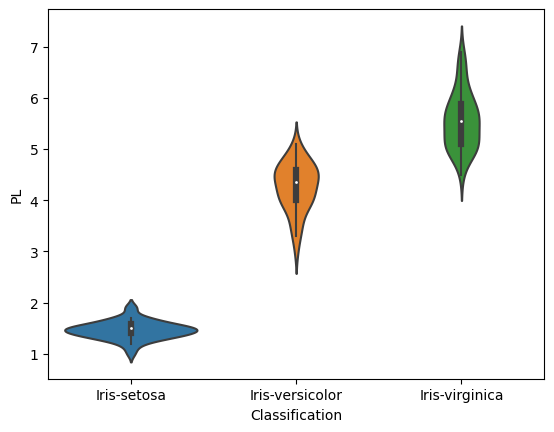

In [11]:
sns.violinplot(x="Classification", y="PL", data=data, size=5, order = cn);

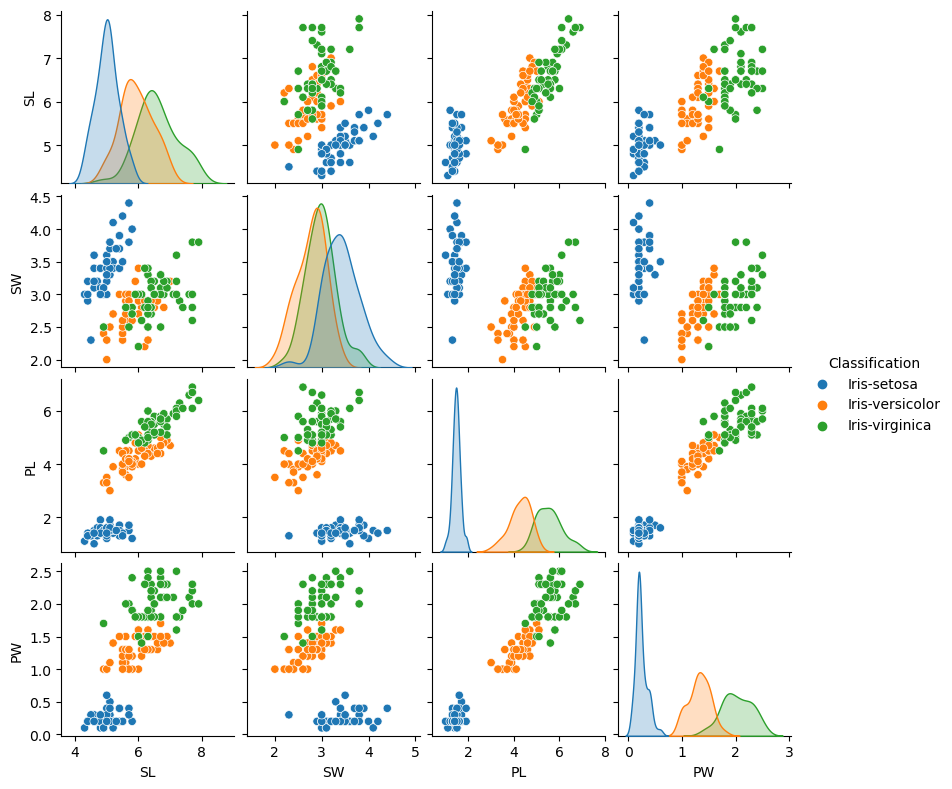

In [12]:
sns.pairplot(data, hue="Classification", height = 2);

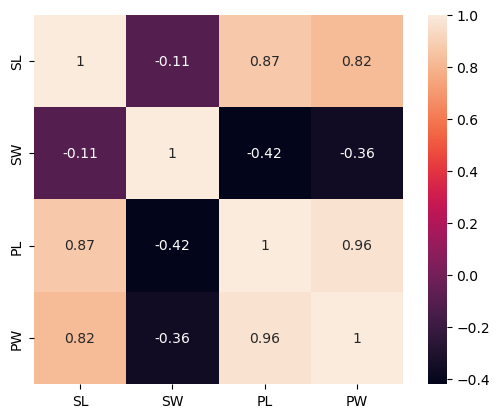

In [13]:
corrmat = data.corr()
sns.heatmap(corrmat, annot = True, square = True);

In [14]:
le=LabelEncoder()
iris=le.fit_transform(data['Classification'])
iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
y=iris
x=data.drop(['Classification'],axis=1)
mm=MinMaxScaler()
x=mm.fit_transform(x)

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=100)
lr=LinearRegression()
model=lr.fit(X_train,Y_train)
Ypred=model.predict(X_test)
print(mean_squared_error(Y_test,Ypred))
print(r2_score(Y_test,Ypred))

0.03951585653737103
0.946371337556425


In [17]:
joblib.dump(lr, 'linr_model_iris.pkl')

['linr_model_iris.pkl']

In [18]:
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,Y_train)
prediction=mod_dt.predict(X_test)
print((accuracy_score(prediction,Y_test)))

0.9736842105263158


In [19]:
joblib.dump(mod_dt, 'dt_model_iris.pkl')

['dt_model_iris.pkl']

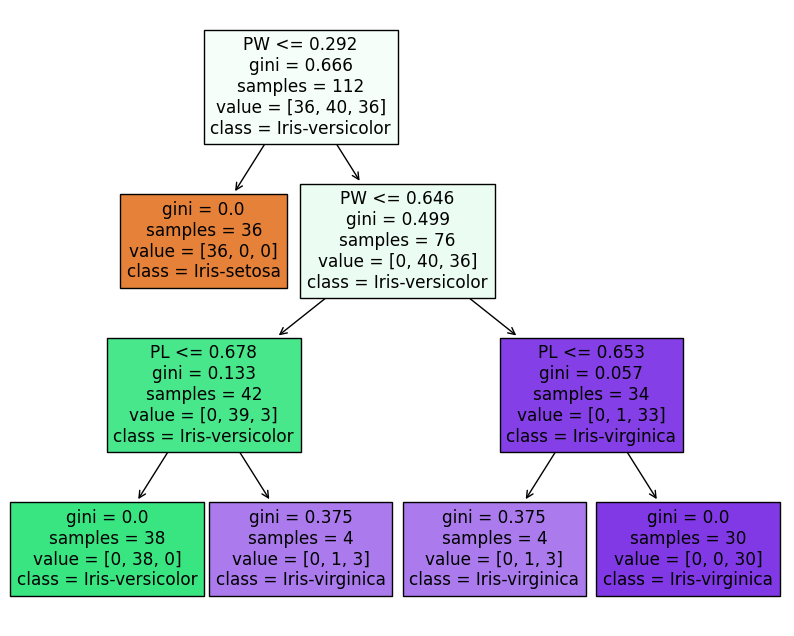

In [20]:
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True);

In [21]:
mod_5nn=KNeighborsClassifier(n_neighbors=5)
mod_5nn.fit(X_train,Y_train)
prediction=mod_5nn.predict(X_test)
print('The accuracy of the 5NN Classifier is',"{:.3f}".format(accuracy_score(prediction,Y_test)))

The accuracy of the 5NN Classifier is 0.974


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [22]:
joblib.dump(mod_5nn, '5nn_model_iris.pkl')

['5nn_model_iris.pkl']

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\AppData\Local\Temp\ipykernel_15008\3015880522.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc_s = acc_s.append(pd.Series(accuracy_score(prediction,Y_test)))
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mo

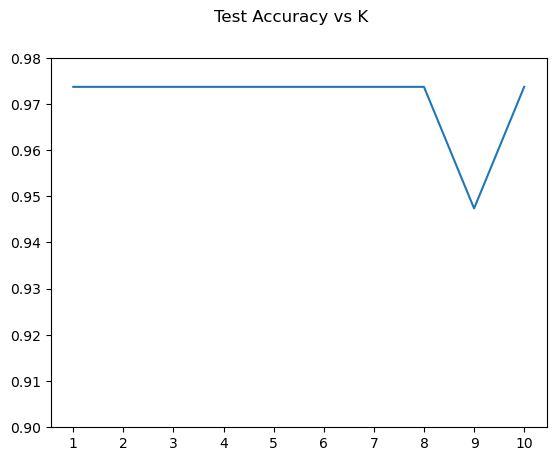

In [23]:
acc_s = pd.Series(dtype = 'float')
for i in list(range(1,11)):
    mod_knn=KNeighborsClassifier(n_neighbors=i)
    mod_knn.fit(X_train,Y_train)
    prediction=mod_knn.predict(X_test)
    acc_s = acc_s.append(pd.Series(accuracy_score(prediction,Y_test)))

plt.plot(list(range(1,11)), acc_s)
plt.suptitle("Test Accuracy vs K")
plt.xticks(list(range(1,11)))
plt.ylim(0.9,0.98);

In [24]:
svc = SVC(kernel='linear').fit(X_train, Y_train)
prediction=svc.predict(X_test)
print('The accuracy of the linear SVC is',"{:.3f}".format(accuracy_score(prediction,Y_test)))

The accuracy of the linear SVC is 0.947


In [25]:
joblib.dump(svc, 'svc_model_iris.pkl')

['svc_model_iris.pkl']

In [26]:
mod_lr = LogisticRegression(solver = 'newton-cg').fit(X_train, Y_train)
prediction=mod_lr.predict(X_test)
print('The accuracy of the Logistic Regression is',"{:.3f}".format(accuracy_score(prediction,Y_test)))

The accuracy of the Logistic Regression is 0.947


In [27]:
joblib.dump(mod_lr, 'logr_model_iris.pkl')

['logr_model_iris.pkl']